In [38]:
import yfinance as yf 
import pandas as pd 
import matplotlib as plt
import matplotlib.pylab as plt 
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import numpy as np 
import seaborn as sns

In [39]:
data1 = yf.download('^VIX')['Adj Close']
data2 = yf.download('VTI')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [40]:
data1 = data1.dropna()
data2 = data2.dropna()

In [41]:
data1 = data1.loc['2023-01-01':'2024-02-05']
data2 = data2.loc['2023-01-01':'2024-02-05']

In [42]:
data1dlyrtn = (data1.shift(-1)-data1)/data1
data2dlyrtn = (data2.shift(-1)-data2)/data2 

In [43]:
data2cumrtn = (1+data2dlyrtn).cumprod()-1

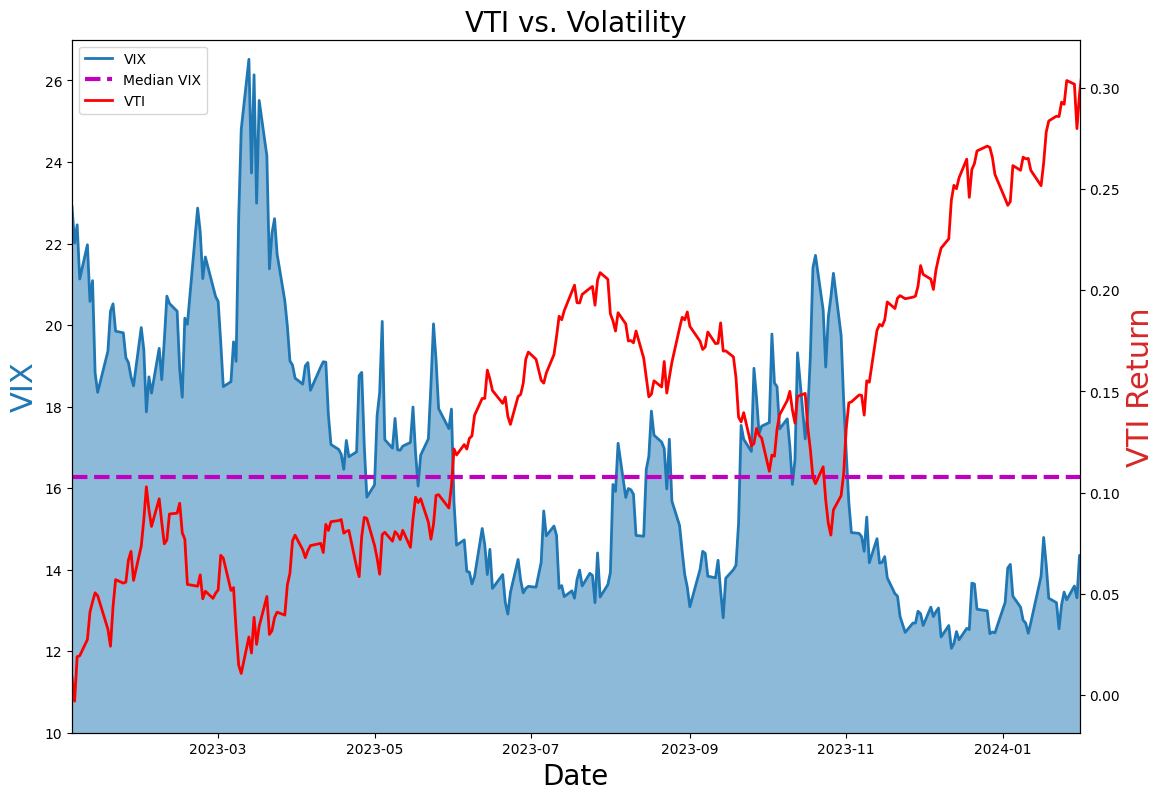

In [44]:
fix,ax = plt.subplots(figsize = (13,9))
plt.title('VTI vs. Volatility', fontsize = 20)
plt.fill_between(data1.index, data1.values, alpha = .5)
ax.plot(data1, linewidth = 2, label = 'VIX')
plt.ylim(10,27)
plt.xlim(19360,19753)
color1 = 'tab:blue'
ax.set_ylabel('VIX', fontsize = 22, color = color1)
ax.set_xlabel('Date', fontsize = 20)
plt.axhline(y=data1.median(), color = 'm', linestyle = '--', linewidth = 3, label = 'Median VIX')
ax.plot(data2cumrtn, linewidth = 2, color = 'red', label = 'VTI')
ax2 = ax.twinx()
ax2.plot(data2cumrtn, linewidth = 2, color = 'red', label = 'VTI')
color2 = 'tab:red'
ax2.set_ylabel('VTI Return', fontsize = 22, color = color2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc = 'upper left');